In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r'D:\VS Codes\Mahi\ML-Task-4\SMSSpamCollection'

df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.25, random_state=42
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Accuracy: 0.9641062455132807

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1207
        spam       1.00      0.73      0.84       186

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



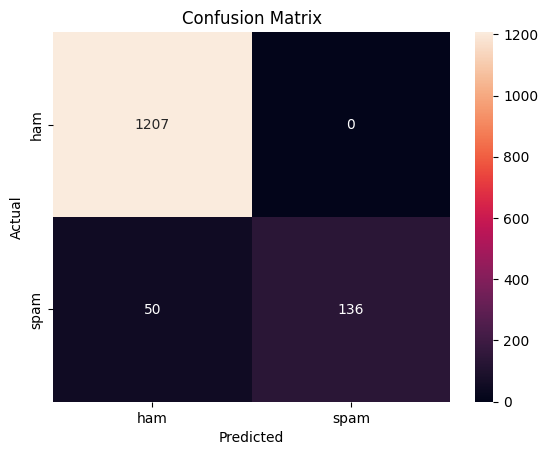

In [5]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
